# Imports

In [1]:
import sys, os

root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

import time
import muspy
from src.io import output, input
from src.io import conversion as conv
from note_seq import midi_to_note_sequence
from mido import MidiFile, MidiTrack

C:\Users\Eric\miniconda3\envs\mpro\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
midi = input.loadMidiFile('../midi/examples/monophonic/mozart1_4b.mid')
mmido = MidiFile('../midi/examples/monophonic/mozart1_4b.mid')
note_seq = midi_to_note_sequence(midi)

# Conversion Speed Tests

### File System Conversion

### Muspy Conversion

In [3]:
t1 = time.time()
stream = conv.pretty_midi_to_music21(midi)
t2 = time.time()
print('🎉 Converted PM to Music21 in ' + str(t2-t1) + ' sec.')

t1 = time.time()
stream = conv.note_seq_to_music21(note_seq)
t2 = time.time()
print('🎉 Converted NS to Music21 in ' + str(t2-t1) + ' sec.')

t1 = time.time()
seq = conv.music21_to_note_seq(stream)
t2 = time.time() 
print('🎉 Converted Music21 to NS in ' + str(t2-t1) + ' sec.')

t1 = time.time()
seq = conv.mido_to_pretty_midi(mmido)
t2 = time.time()
print('🎉 Converted Mido to NS in    ' + str(t2-t1) + ' sec.')

🎉 Converted PM to Music21 in 0.04100441932678223 sec.
🎉 Converted NS to Music21 in 0.03098320960998535 sec.
🎉 Converted Music21 to NS in 0.011994600296020508 sec.
🎉 Converted Mido to NS in    0.0010042190551757812 sec.


# Conversion Accuracy Tests

In [4]:
output.pianoRoll(midi)
midi.instruments[0].notes

Loading BokehJS ...

[Note(start=0.015625, end=0.108398, pitch=79, velocity=95),
 Note(start=0.703125, end=0.791016, pitch=74, velocity=86),
 Note(start=0.936523, end=0.998047, pitch=79, velocity=94),
 Note(start=1.644531, end=1.738281, pitch=74, velocity=75),
 Note(start=1.877930, end=1.970703, pitch=79, velocity=92),
 Note(start=2.099609, end=2.193359, pitch=74, velocity=87),
 Note(start=2.342773, end=2.416016, pitch=79, velocity=91),
 Note(start=2.576172, end=2.658203, pitch=83, velocity=94),
 Note(start=2.808594, end=3.538086, pitch=86, velocity=95),
 Note(start=3.754883, end=3.822266, pitch=84, velocity=103),
 Note(start=4.454102, end=4.536133, pitch=81, velocity=81),
 Note(start=4.686523, end=4.785156, pitch=84, velocity=86),
 Note(start=5.384766, end=5.467773, pitch=81, velocity=82),
 Note(start=5.623047, end=5.710938, pitch=84, velocity=83),
 Note(start=5.855469, end=5.948242, pitch=81, velocity=92),
 Note(start=6.093750, end=6.181641, pitch=78, velocity=99),
 Note(start=6.326172, end=6.403320, pit

In [5]:
print(midi.get_tempo_changes()[1])
print(midi.resolution)
print(midi.time_to_tick(midi.instruments[0].notes[0].start))

[128.]
480
16


In [6]:
mus = muspy.from_pretty_midi(midi)
midi.tick_to_time(mus.tracks[0].notes[0].time)

0.0009765625

start: 0.0 end: 0.0 <music21.tempo.MetronomeMark allegro moderato Quarter=128.0>
start: 0.0 end: 0.0 <music21.meter.TimeSignature 4/4>
start: 0.0 end: 1.85546875 <music21.note.Note G>
start: 1.8554687484374999 end: 3.6132812484375 <music21.note.Note D>
start: 3.6132812484375 end: 4.8437499984375005 <music21.note.Note G>
start: 4.8437499984375005 end: 6.7187499984375005 <music21.note.Note D>
start: 6.7187499984375005 end: 8.5742187484375 <music21.note.Note G>
start: 8.574218751562501 end: 10.449218751562501 <music21.note.Note D>
start: 10.449218751562501 end: 11.914062501562501 <music21.note.Note G>
start: 11.914062501562501 end: 13.554687501562501 <music21.note.Note B>
start: 13.554687501562501 end: 28.144531251562498 <music21.note.Note D>
start: 28.144531251562498 end: 29.492187501562498 <music21.note.Note C>
start: 29.492187501562498 end: 31.132812501562498 <music21.note.Note A>
start: 31.132812501562498 end: 33.1054687515625 <music21.note.Note C>
start: 33.10546875 end: 34.765625 <m

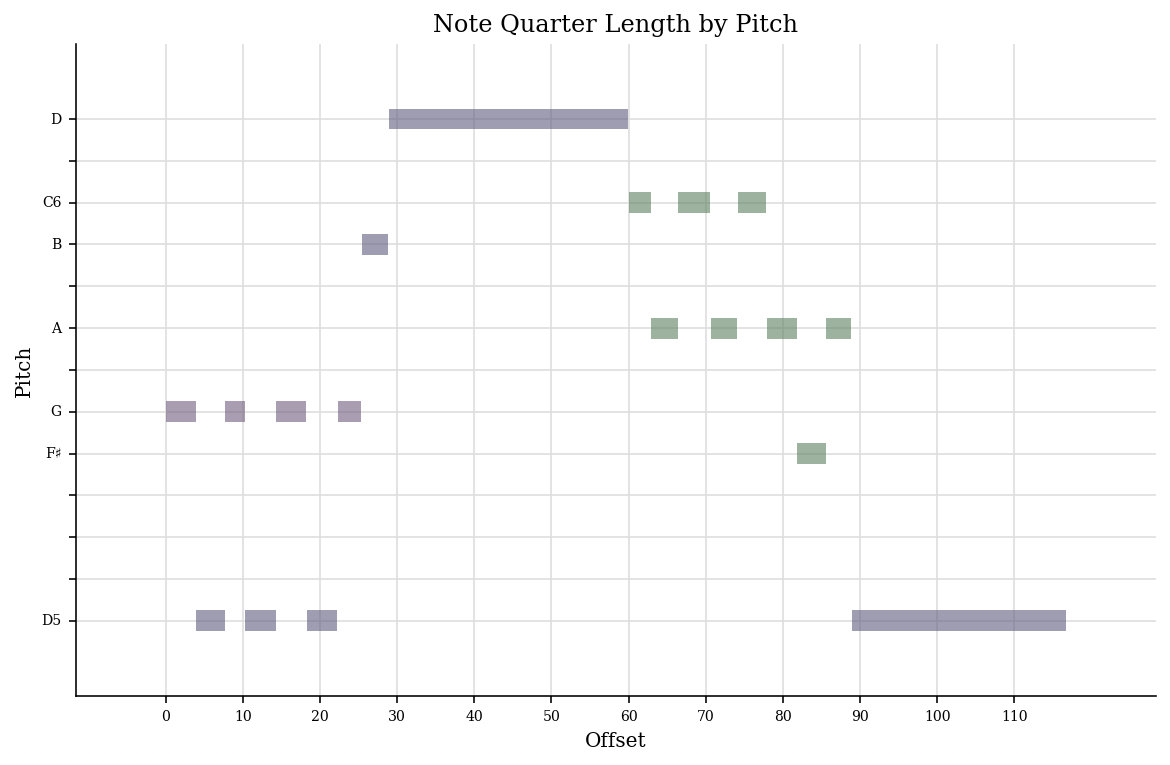

In [7]:
#for n in stream.parts[0].notes:
    # print('pitch:', n.pitch.ps, 'velocity:', n.volume.velocity)
for n in stream.parts[0].secondsMap:
    print('start:', n['offsetSeconds'], 'end:', n['endTimeSeconds'], n['element'])
stream.plot()

In [8]:
interm = muspy.from_music21(stream)
interm.tracks[0].notes
interm.resolution = 480

In [9]:
back = muspy.to_pretty_midi(interm)
back.instruments[0].notes

[Note(start=0.000000, end=95.000000, pitch=79, velocity=95),
 Note(start=95.000000, end=185.000000, pitch=74, velocity=86),
 Note(start=185.000000, end=248.000000, pitch=79, velocity=94),
 Note(start=248.000000, end=344.000000, pitch=74, velocity=75),
 Note(start=344.000000, end=439.000000, pitch=79, velocity=92),
 Note(start=439.000000, end=535.000000, pitch=74, velocity=87),
 Note(start=535.000000, end=610.000000, pitch=79, velocity=91),
 Note(start=610.000000, end=694.000000, pitch=83, velocity=94),
 Note(start=694.000000, end=1441.000000, pitch=86, velocity=95),
 Note(start=1441.000000, end=1510.000000, pitch=84, velocity=103),
 Note(start=1510.000000, end=1594.000000, pitch=81, velocity=81),
 Note(start=1594.000000, end=1695.000000, pitch=84, velocity=86),
 Note(start=1695.000000, end=1780.000000, pitch=81, velocity=82),
 Note(start=1780.000000, end=1870.000000, pitch=84, velocity=83),
 Note(start=1870.000000, end=1965.000000, pitch=81, velocity=92),
 Note(start=1965.000000, end=2